In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [2]:
def plot_roc_curve(fpr,tpr,roc_auc):
    plt.figure()
    lw = 2
    plt.figure(figsize = (6,6))
    plt.plot(fpr,tpr,color = 'darkorange',
            lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
mu_0 = 0
mu_1 = 2
sigma = 1
np.random.seed(0)

n1_train = 100
X1_train = np.random.normal(mu_1,sigma,n1_train)

n1_test = 1000
X1_test = np.random.normal(mu_1,sigma,n1_test)

In [7]:
# n0/n1 = 1

ratio_r1 = 1
n0_train_r1 = n1_train * ratio_r1
X0_train_r1 = np.random.normal(mu_0,sigma,n0_train_r1)

n0_test_r1 = n1_test*ratio_r1
X0_test_r1 = np.random.normal(mu_0,sigma,n0_test_r1)

## np.r_ is used to concatenate any number of array slices along row axis
X_train_r1 = np.r_[X1_train, X0_train_r1].reshape(-1, 1)
X_test_r1 = np.r_[X1_test, X0_test_r1].reshape(-1, 1)

## [0]*10 will produce [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_train_r1 = np.r_[[1]*n1_train, [0]*n0_train_r1]
y_test_r1 = np.r_[[1]*n1_test, [0]*n0_test_r1]

### Logistic Regression

Text(0.5, 1.0, 'Precision-Recall Curve')

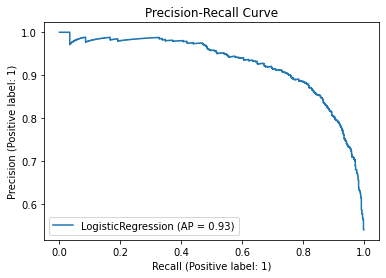

In [9]:
lr_r1 = LogisticRegression(penalty = 'none').fit(X_train_r1,y_train_r1)
disp = plot_precision_recall_curve(lr_r1, X_test_r1, y_test_r1)
disp.ax_.set_title('Precision-Recall Curve')

<Figure size 432x288 with 0 Axes>

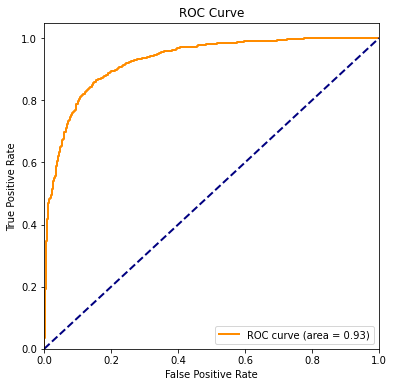

In [10]:
y_score_r1_lr = lr_r1.predict_proba(X_test_r1)[:, 1]
fpr, tpr, thersholds = roc_curve(y_test_r1, y_score_r1_lr)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc)

### Linear Discriminant Analysis

Text(0.5, 1.0, 'Precision-Recall Curve')

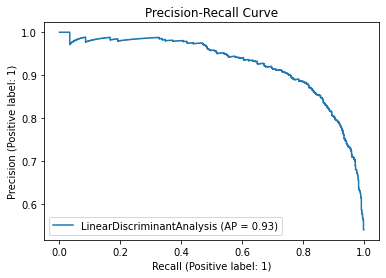

In [11]:
lda_r1 = LinearDiscriminantAnalysis().fit(X_train_r1, y_train_r1)
disp = plot_precision_recall_curve(lda_r1, X_test_r1, y_test_r1)
disp.ax_.set_title('Precision-Recall Curve')

<Figure size 432x288 with 0 Axes>

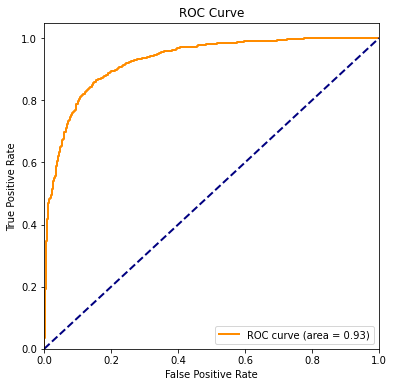

In [12]:
y_score_r1_lda = lda_r1.predict_proba(X_test_r1)[:, 1]
fpr, tpr, thersholds = roc_curve(y_test_r1, y_score_r1_lda)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc)

### Random Forest Classifier

Text(0.5, 1.0, 'Precision-Recall Curve')

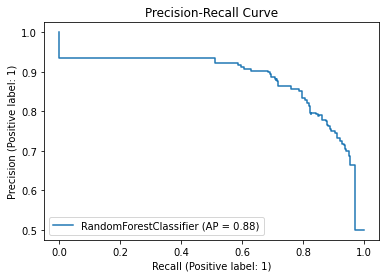

In [13]:
rfc_r1 = RandomForestClassifier().fit(X_train_r1, y_train_r1)
disp = plot_precision_recall_curve(rfc_r1, X_test_r1, y_test_r1)
disp.ax_.set_title('Precision-Recall Curve')

<Figure size 432x288 with 0 Axes>

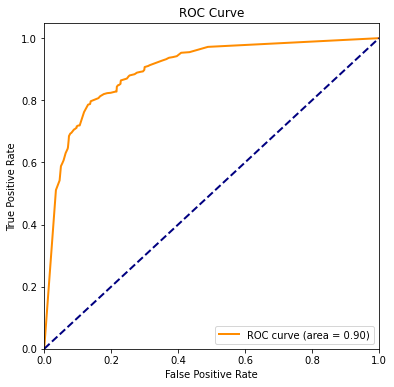

In [14]:
y_score_r1_rfc = rfc_r1.predict_proba(X_test_r1)[:, 1]
fpr, tpr, thersholds = roc_curve(y_test_r1, y_score_r1_rfc)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc)

In [16]:
# n0/n1 = 4
ratio_r2 = 4
n0_train_r2 = n1_train * ratio_r2
X0_train_r2 = np.random.normal(mu_0, sigma, n0_train_r2)
n0_test_r2 = n1_test * ratio_r2
X0_test_r2 = np.random.normal(mu_0, sigma, n0_test_r2)
## np.r_ is used to concatenate any number of array slices along row axis
X_train_r2 = np.r_[X1_train, X0_train_r2].reshape(-1, 1)
X_test_r2 = np.r_[X1_test, X0_test_r2].reshape(-1, 1)
## [0]*10 will produce [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_train_r2 = np.r_[[1]*n1_train, [0]*n0_train_r2]
y_test_r2 = np.r_[[1]*n1_test, [0]*n0_test_r2]

### Linear Discriminant Analysis

In [ ]:
lr_r2 = LogisticRegression(penalty='none').fit(X_train_r2, y_train_r2)
disp = plot_precision_recall_curve(lr_r2, X_test_r2, y_test_r2)
disp.ax_.set_title('Precision-Recall Curve')

<Figure size 432x288 with 0 Axes>

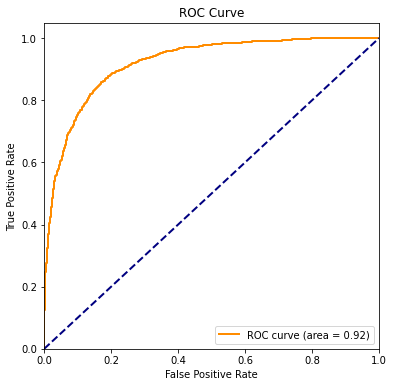

In [18]:
y_score_r2_lr = lr_r2.predict_proba(X_test_r2)[:, 1]
fpr, tpr, thersholds = roc_curve(y_test_r2, y_score_r2_lr)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc)

### Random Forest Classifier

Text(0.5, 1.0, 'Precision-Recall Curve')

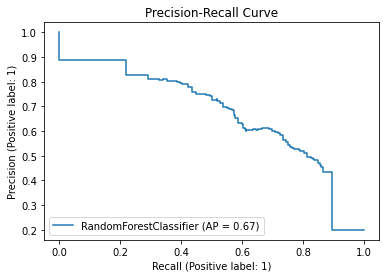

In [19]:
rfc_r2 = RandomForestClassifier().fit(X_train_r2, y_train_r2)
disp = plot_precision_recall_curve(rfc_r2, X_test_r2, y_test_r2)
disp.ax_.set_title('Precision-Recall Curve')


<Figure size 432x288 with 0 Axes>

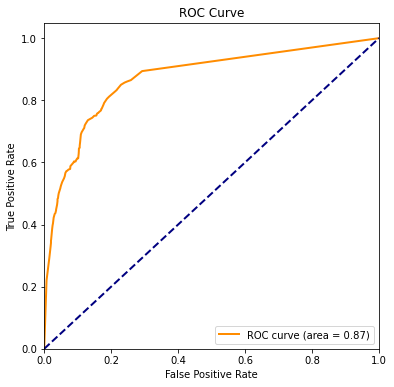

In [20]:
y_score_r2_rfc = rfc_r2.predict_proba(X_test_r2)[:, 1]
fpr, tpr, thersholds = roc_curve(y_test_r2, y_score_r2_rfc)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc)

In [21]:
# n0/n1 = 9
ratio_r3 = 9
n0_train_r3 = n1_train * ratio_r3
X0_train_r3 = np.random.normal(mu_0, sigma, n0_train_r3)
n0_test_r3 = n1_test * ratio_r3
X0_test_r3 = np.random.normal(mu_0, sigma, n0_test_r3)
## np.r_ is used to concatenate any number of array slices along row axis
X_train_r3 = np.r_[X1_train, X0_train_r3].reshape(-1, 1)
X_test_r3 = np.r_[X1_test, X0_test_r3].reshape(-1, 1)
## [0]*10 will produce [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_train_r3 = np.r_[[1]*n1_train, [0]*n0_train_r3]
y_test_r3 = np.r_[[1]*n1_test, [0]*n0_test_r3]


### Logistic Regression

Text(0.5, 1.0, 'Precision-Recall Curve')

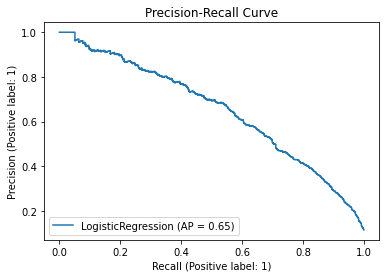

In [22]:
lr_r3 = LogisticRegression(penalty='none').fit(X_train_r3, y_train_r3)
disp = plot_precision_recall_curve(lr_r3, X_test_r3, y_test_r3)
disp.ax_.set_title('Precision-Recall Curve')

<Figure size 432x288 with 0 Axes>

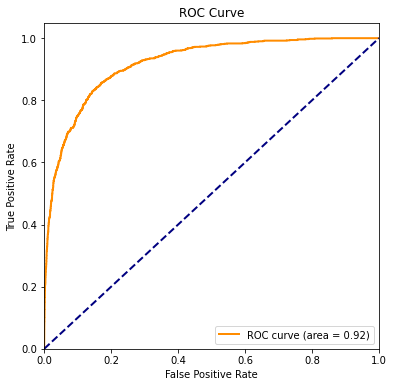

In [23]:
y_score_r3_lr = lr_r3.predict_proba(X_test_r3)[:, 1]
fpr, tpr, thersholds = roc_curve(y_test_r3, y_score_r3_lr)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc)

### Linear Discriminant Analysis

Text(0.5, 1.0, 'Precision-Recall Curve')

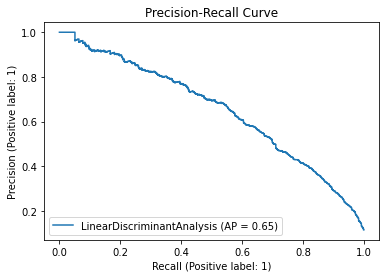

In [26]:
lda_r3 = LinearDiscriminantAnalysis().fit(X_train_r3, y_train_r3)
disp = plot_precision_recall_curve(lda_r3, X_test_r3, y_test_r3)
disp.ax_.set_title('Precision-Recall Curve')

<Figure size 432x288 with 0 Axes>

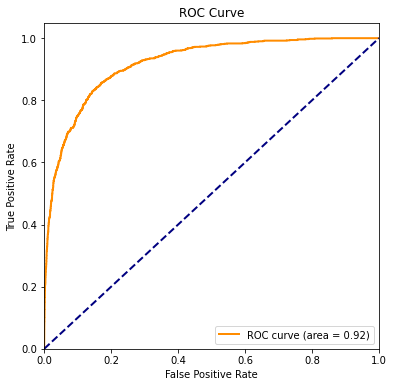

In [27]:
y_score_r3_lda = lda_r3.predict_proba(X_test_r3)[:, 1]
fpr, tpr, thersholds = roc_curve(y_test_r3, y_score_r3_lda)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc)

### Random Forest Classifier

Text(0.5, 1.0, 'Precision-Recall Curve')

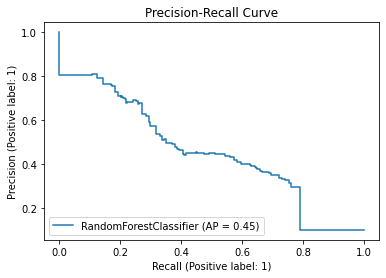

In [28]:
rfc_r3 = RandomForestClassifier().fit(X_train_r3, y_train_r3)
disp = plot_precision_recall_curve(rfc_r3, X_test_r3, y_test_r3)
disp.ax_.set_title('Precision-Recall Curve')

<Figure size 432x288 with 0 Axes>

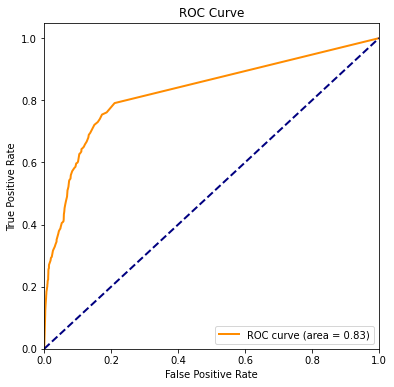

In [29]:
y_score_r3_rfc = rfc_r3.predict_proba(X_test_r3)[:, 1]
fpr, tpr, thersholds = roc_curve(y_test_r3, y_score_r3_rfc)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc)